In [1]:
# IMPORTING LIBRARIES:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv("train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [6]:
# number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# we will have to do something with those missing values to improve our data...

# since most of the cabin column is missing from our data we cannot take mean or anything 
# else to replace it with cause it would make no sense, so we drop the column entirely.

In [8]:
# dropping cabin:
# if you run this cell more than once you will get a keyerror denoting that there is 
# not cabin in the data this is because it has already been removed.

titanic_data = titanic_data.drop(columns="Cabin", axis=1)

In [9]:
# we can replace the missing age values with the mean:

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
# finding the mode value of "Embarked" column
# here we cannot use mean cause its string object type.

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0])

# mode = S

S


In [12]:
# replacing the missing values in "Embarked" column with mode value:

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
# now we check the data again to see if it contains any missing values which it does not:

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# DATA ANALYSIS:

In [15]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# finding the number of people who survived and people who did not, 1 = survived:

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# DATA VISUALIZATION:

In [18]:
sns.set()

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

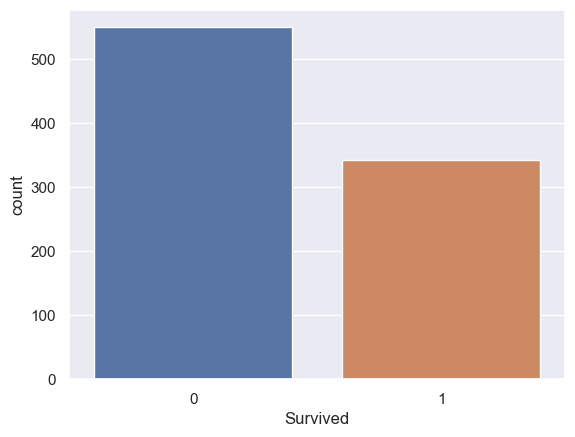

In [19]:
# making a countplot for Survived people:

sns.countplot('Survived', data=titanic_data)

In [20]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

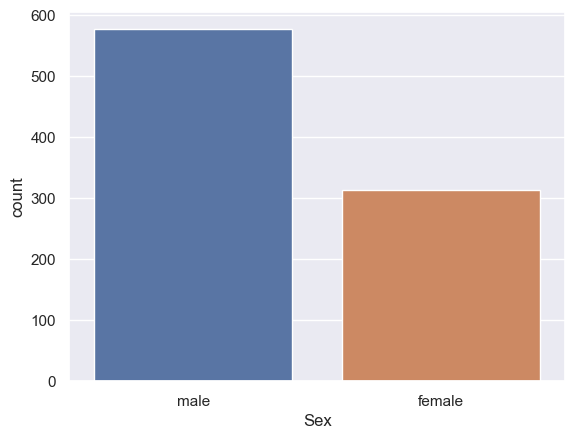

In [21]:
# comparing the number of male and female passengers present in the ship:

sns.countplot('Sex', data=titanic_data)

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

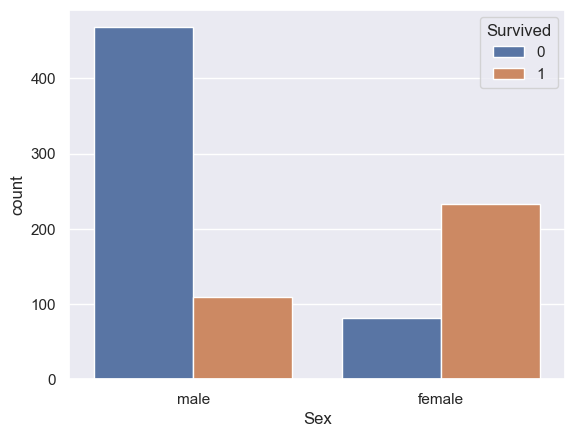

In [22]:
# number of survivors Gender wise:

sns.countplot('Sex', hue='Survived', data=titanic_data)

In [23]:
# as we can see above, the women were given priority and evacuated early

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

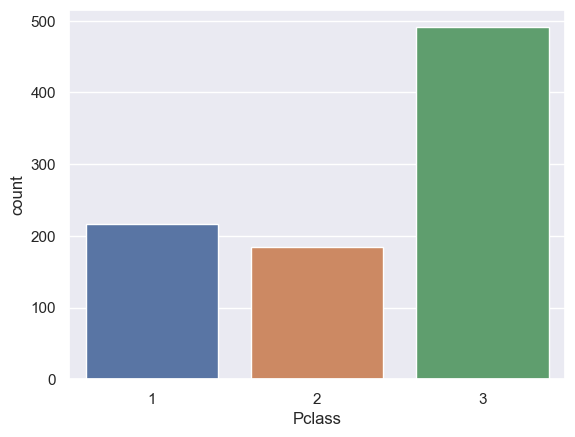

In [24]:
# making a count plot for "Pclass" column:

sns.countplot('Pclass', data=titanic_data)

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

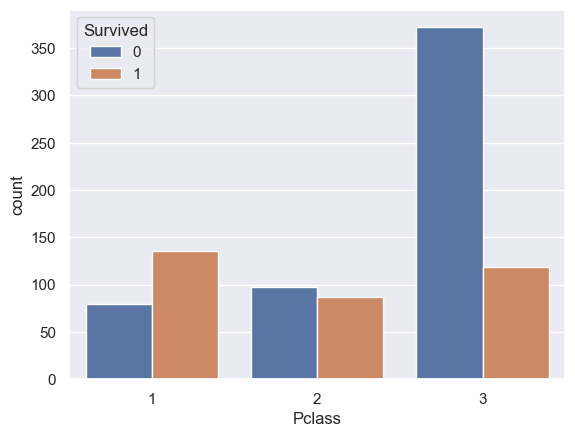

In [25]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

In [26]:
# from the above plot it is clear that the passengers present in the higher class were also given priority

<AxesSubplot:>

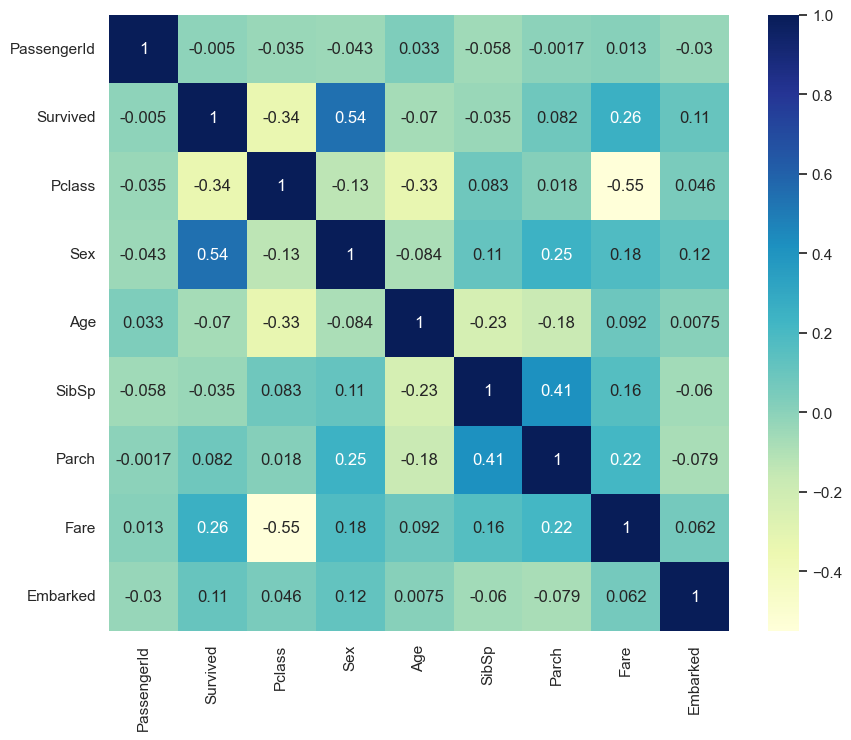

In [50]:
# correlation matrix
# here we can see how each column corresponds to each other column and how they affect each other:

# to set the size of the plot, us
plt.figure(figsize=(10, 8))

sns.heatmap(titanic_data.corr(), cmap="YlGnBu", annot=True)

In [28]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
# converting categorical Columns
# here we are replacing the values of "Sex" and "Embarked" so that it can be computed easily

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [32]:
# now we split the survived column as its the column we have to predict and we use other columns as training data:

In [33]:
# we will first drop columns which are useless to us:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

Y = titanic_data['Survived']

In [34]:
print(X)
# here we can see that x now only contains pclass, sex, age, sibsp, parch, fare and embarked.

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [35]:
print(Y)
# we can also see that y only contains the survived column

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [36]:
# NOW WE SPLIT THE DATA INTO TRAINING DATA AND TEST DATA:

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

# test size is 0.2 to denote 20%.

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [39]:
# MODEL TRAINING:

In [40]:
model = LogisticRegression()

In [41]:
# training the Logistic Regression model with training data:

model.fit(X_train, Y_train)

C:\Users\avina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# MODEL EVALUATION:

In [43]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [44]:
print(X_train_prediction)

[0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 0 1 

In [45]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7921348314606742


In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [47]:
print(X_test_prediction)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [48]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8212290502793296
